# <font color=green> Numpy

<font color=green> **The aim of this project is to initiate the study of the NumPy and Jupyter Notebook libraries, providing a clearer approach to enhance, summarize, and acquire basic knowledge of the Python language and its libraries. In this initial project, i will examine a primary dataset consisting of three fundamental exercises.** <font>

Several practices will be employed in this study:

1- Below certain commands, there will be a summary of their meanings.

2- All text will be written in English.

3- The data has been extracted from exercises on the Alura platform.

4- Each dataset will have a summary of the meaning of each column and row.


**Our primary dataset was taken from an url: > https://raw.githubusercontent.com/alura-cursos/numpy/dados/apples_ts.csv <**

In this dataset, you will find information about the selling prices of apples in five Russian cities.

The columns are denoted by the date format: month/year.

The rows are identified by the city names.

**Our secondary dataset was also taken from an url: > https://raw.githubusercontent.com/allanspadini/numpy/dados/citrus.csv <**

This dataset was based on this dataet from kaggle: https://www.kaggle.com/datasets/joshmcadams/oranges-vs-grapefruit with some changes.

In this dataset, you will find information about grapefruits and oranges.

The columns are denoted by Weight and Diameter

The rows are indentified by orange or grapefruits


# Loading Data

In [2]:
import numpy as np

primary = 'https://raw.githubusercontent.com/alura-cursos/numpy/dados/apples_ts.csv'
secondary = 'https://raw.githubusercontent.com/allanspadini/numpy/dados/citrus.csv'

primary_data = np.loadtxt(primary, delimiter=',', usecols=np.arange(1,88,1)) # necessary to skip first column since it's a string

secondary_data = np.loadtxt(secondary, delimiter=',', skiprows=1, usecols=np.arange(1,6,1)) # On the exercise will be explained why skipping first row

# Printing shape of our dataset

print("The primary dataset size is: {}" .format(primary_data.shape))
print("The secondary dataset size is: {}" .format(secondary_data.shape))


The primary dataset size is: (6, 87)
The secondary dataset size is: (10000, 5)


# First Visualization

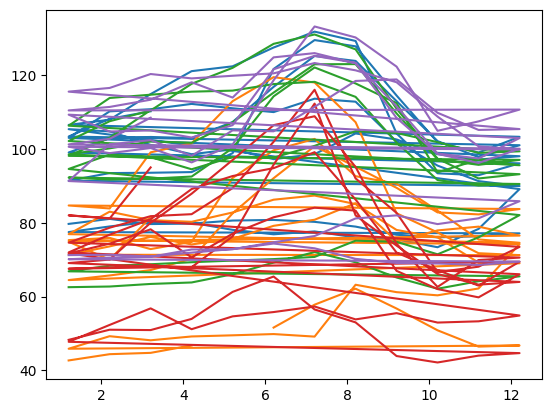

In [3]:
# importing matplotlib library for visualization

import matplotlib.pyplot as plt

# To enhance the dataset's visualization, i will transpose it.

transposed_primary_data = primary_data.T

# Gather the information about date and prices

dates = transposed_primary_data[:,0]

prices = transposed_primary_data[:,1:6]

# First visualization

plt.plot(dates, prices)

As we can observe, in this initial visualization, is not possible to find any valuable information within our dataset. The primary reason for this is that the "dates" array consists of broken numbers instead of dates or in a linear form.

To generate a value over time graph, lets convert the date array into an arithmetic sequence.

# Data Treatment

In [4]:
# Transform dates array

dates = np.arange(1,(dates.size + 1),1)

# For better visualization i'll separate this unique graphic in five (for each city)

Moscow = prices[:,0]
Kaliningrad = prices[:,1]
Petersburg = prices[:,2]
Krasnodar = prices[:,3]
Ekaterinburg = prices[:,4]

# Checking for nan values

print("The number of nan values of Moscow is: {}" .format(sum(np.isnan(Moscow))))
print("The number of nan values of Kaliningrad is: {}" .format(sum(np.isnan(Kaliningrad))))
print("The number of nan values of Petersburg is: {}" .format(sum(np.isnan(Petersburg))))
print("The number of nan values of Krasnodar is: {}" .format(sum(np.isnan(Krasnodar))))
print("The number of nan values of Ekaterinburg is: {}" .format(sum(np.isnan(Ekaterinburg))))

The number of nan values of Moscow is: 0
The number of nan values of Kaliningrad is: 1
The number of nan values of Petersburg is: 0
The number of nan values of Krasnodar is: 0
The number of nan values of Ekaterinburg is: 0


In [5]:
# Find the location of the "NaN" value.

Kaliningrad

array([ 42.67,  44.37,  44.73,  46.75,    nan,  51.59,  57.8 ,  62.14,
        56.76,  50.85,  46.43,  46.73,  45.85,  49.25,  48.14,  49.18,
        49.49,  49.83,  49.14,  63.21,  61.2 ,  60.34,  62.2 ,  74.2 ,
        75.32,  75.92,  72.89,  74.85,  92.19,  99.7 , 102.78,  92.67,
        90.63,  83.31,  75.5 ,  74.6 ,  76.94,  83.04,  80.74,  80.29,
        82.82,  86.29,  87.41,  85.1 ,  78.08,  76.06,  69.23,  69.04,
        64.48,  65.73,  67.2 ,  70.25,  82.59,  92.12, 100.82,  95.23,
        89.51,  82.84,  82.3 ,  83.76,  84.72,  83.91,  99.14, 101.6 ,
       113.03, 119.54, 118.09, 107.32,  82.6 ,  77.4 ,  71.77,  71.25,
        71.35,  73.62,  76.2 ,  74.15,  75.67,  79.2 ,  80.85,  85.33,
        75.02,  77.95,  78.98,  76.55,  74.89,  70.  ,  81.53])

In [6]:
# In this scenario, I opted to substitute the "NaN" value with the mean value derived from the preceding month and the subsequent one.

Kaliningrad [4] = np.mean([Kaliningrad[3],Kaliningrad[5]])
Kaliningrad

array([ 42.67,  44.37,  44.73,  46.75,  49.17,  51.59,  57.8 ,  62.14,
        56.76,  50.85,  46.43,  46.73,  45.85,  49.25,  48.14,  49.18,
        49.49,  49.83,  49.14,  63.21,  61.2 ,  60.34,  62.2 ,  74.2 ,
        75.32,  75.92,  72.89,  74.85,  92.19,  99.7 , 102.78,  92.67,
        90.63,  83.31,  75.5 ,  74.6 ,  76.94,  83.04,  80.74,  80.29,
        82.82,  86.29,  87.41,  85.1 ,  78.08,  76.06,  69.23,  69.04,
        64.48,  65.73,  67.2 ,  70.25,  82.59,  92.12, 100.82,  95.23,
        89.51,  82.84,  82.3 ,  83.76,  84.72,  83.91,  99.14, 101.6 ,
       113.03, 119.54, 118.09, 107.32,  82.6 ,  77.4 ,  71.77,  71.25,
        71.35,  73.62,  76.2 ,  74.15,  75.67,  79.2 ,  80.85,  85.33,
        75.02,  77.95,  78.98,  76.55,  74.89,  70.  ,  81.53])

# Linear Regression

In [11]:
# Calculating angular & linear coefficient using Formula & Kaliningrad data

Y = Kaliningrad
n = np.size(Kaliningrad)
X = dates

a = (n*np.sum(X*Y) - np.sum(X)*np.sum(Y))/(n*np.sum(X**2) - np.sum(X)**2)
b = np.mean(Y) - a*np.mean(X)

y = a*X+b

np.linalg.norm(Kaliningrad - y)

130.07018928429233

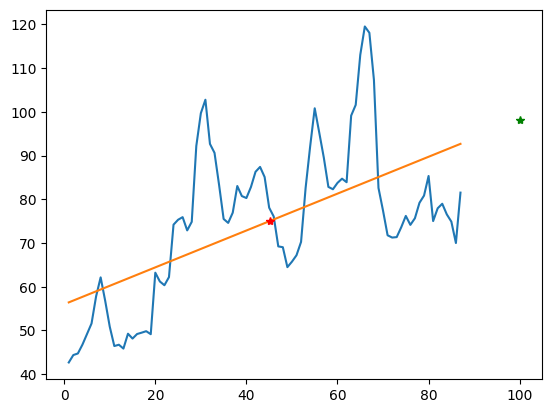

In [22]:
# Generate a line using the informations giving by the coefficients


plt.plot(dates, Kaliningrad)
plt.plot(dates,y)

# Predict the linear projection in two situations
plt.plot(45.1,45.1*a+b,'*r')
plt.plot(100,100*a+b,'*g')

In [59]:
# Calculating angular & linear coefficient using Random Generation to check quality of coefficients

np.random.seed(16)
coef_ang = np.random.uniform(low=0.1, high=0.9, size=100)

norma = np.array([])
for i in range(100):
    norma = np.append(norma,np.linalg.norm(Kaliningrad-(coef_ang[i]*X+b)))


coef_ang[norma.argmin()]

0.4203383992573465

# Saving

Now is time to save those informations to use in future projects.

In [60]:
numpy_coef = np.column_stack([norma, coef_ang])

np.savetxt('Dados/numpy_coef.csv', numpy_coef, delimiter=',')

### ----------

# Exercises

Exercise-01)

It's time for you to test the knowledge developed during the class. Continuing with the orange/grapefruit project, now you should select part of the data. The columns we will evaluate are the diameter and weight. Create specific arrays to store the diameter and weight of the orange and grapefruit. The diameter is in column zero, and the weight is in column one. The data for the orange goes up to line 4999, and the data for the grapefruit starts at line 5000 in the file.

After selecting the data, import the Matplotlib library and create a graph for the orange and grapefruit based on weight and diameter.

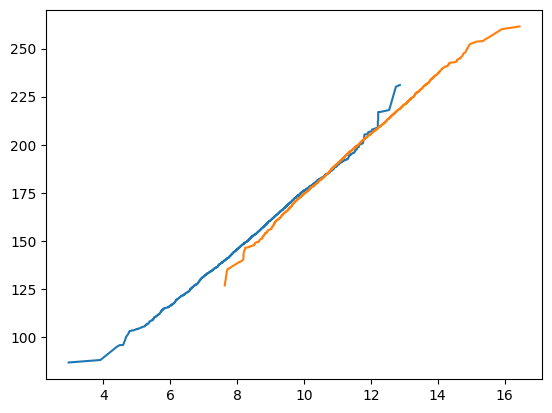

In [89]:
oranges_weight = secondary_data[:5000,1]
grapefruit_weight = secondary_data[5000:,1]

oranges_diameter = secondary_data[:5000,0]
grapefruit_diameter = secondary_data[5000:,0]

plt.plot(oranges_diameter, oranges_weight)
plt.plot(grapefruit_diameter, grapefruit_weight)

Exercise-02)

It's time for you to test the knowledge developed during the class. Continuing with the orange/grapefruit project, now you should calculate the angular and linear coefficients for the orange line and the grapefruit line. Use the least squares formula to find each one.

In [96]:
Y_orange = oranges_weight
X_orange= oranges_diameter
n_orange = np.size(X_orange)


a_orange = (n_orange*np.sum(X_orange*Y_orange) - np.sum(X_orange)*np.sum(Y_orange))/(n_orange*np.sum(X_orange**2) - np.sum(X_orange)**2)
b_orange = np.mean(Y_orange) - a_orange*np.mean(X_orange)

print(a_orange,b_orange)

14.7997452319846 27.38560381218413


In [97]:
Y_grapefruit = grapefruit_weight
X_grapefruit= grapefruit_diameter
n_grapefruit = np.size(X_grapefruit)


a_grapefruit = (n_grapefruit*np.sum(X_grapefruit*Y_grapefruit) - np.sum(X_grapefruit)*np.sum(Y_grapefruit))/(n_grapefruit*np.sum(X_grapefruit**2) - np.sum(X_grapefruit)**2)
b_grapefruit = np.mean(Y_grapefruit) - a_grapefruit*np.mean(X_grapefruit)

print(a_grapefruit,b_grapefruit)

15.70884459360376 17.007102876817726


Exercise-03)

It's time for you to test the knowledge developed during the class. Continuing with the orange/grapefruit project, now you should calculate the angular coefficient using the generation of random numbers. Assume that you already know the value of b, and it is equal to 17.

In [99]:
np.random.seed(84)
coef_ang_orange = np.random.uniform(low=0, high=30, size=100)

norma_orange = np.array([])
for i in range(100):
    norma_orange = np.append(norma_orange, np.linalg.norm(oranges_weight-(coef_ang_orange[i]*X_orange+17)))

coef_ang_orange[norma_orange.argmin()]

16.068386928449215

In [100]:
np.random.seed(84)
coef_ang_grapefruit = np.random.uniform(low=0, high=30, size=100)

norma_grapefruit = np.array([])
for i in range(100):
    norma_grapefruit = np.append(norma_grapefruit, np.linalg.norm(grapefruit_weight-(coef_ang_grapefruit[i]*X_grapefruit+17)))

coef_ang_grapefruit[norma_grapefruit.argmin()]

15.825121993784064